<a href="https://colab.research.google.com/github/mvmoghadam1999/Mp2_testing/blob/main/ML_MP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


q1_2 -> plotting the function

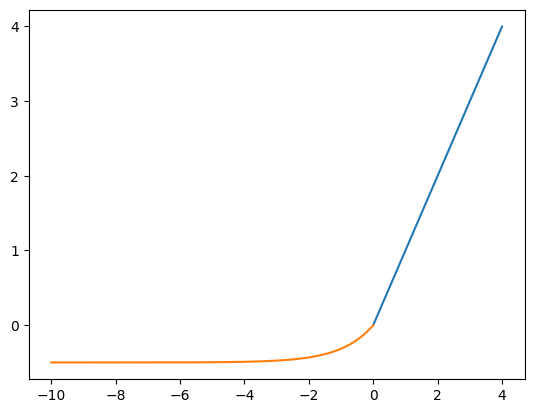

In [2]:
alpha = 0.5
x1 = np.linspace(0 , 4 , 1000)
x2 = np.linspace(-10 , 0 , 1000)
y1 = x1
y2 = alpha*(np.exp(x2) - 1)
plt.plot(x1 , y1)
plt.plot(x2 , y2)
plt.show()

q1_3 -> `McCulloch_Putts_neuron` class

In [3]:
def ReLU(x):
  return max(0 , x)
def sigmoid(x):
    return 1/(1+np.exp(-x))
class McCulloch_Pitts_neuron():

  def __init__(self , weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self , x):
    if self.weights @ x >= self.threshold:
        return 1
    else:
        return 0
  def model_ReLU(self , x):
    out_relu = ReLU((self.weights @ x) - self.threshold)
    if out_relu == (self.weights @ x) - self.threshold:
      return 1
    if out_relu == 0:
      return 0
  def model_sig(self , x):
    out_sig = sigmoid((self.weights @ x) - self.threshold)
    if out_sig >= 0.5:
      return 1
    if out_sig <= 0.5:
      return 0



`Area` normal function to predict points in "triangle"

In [4]:
def Area(x, y):
  neur1 = McCulloch_Pitts_neuron([2, -1], 2)
  neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model(np.array([x, y]))
  z2 = neur2.model(np.array([x, y]))
  z3 = neur3.model(np.array([x, y]))
  z4 = neur4.model(np.array([z1, z2, z3]))

  return list([z4]) , neur1 , neur2 , neur3

`Area` with `ReLU` function to predict points in "triangle"

In [5]:
def Area_ReLU(x, y):
  neur1 = McCulloch_Pitts_neuron([2, -1], 2)
  neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model_ReLU(np.array([x, y]))
  z2 = neur2.model_ReLU(np.array([x, y]))
  z3 = neur3.model_ReLU(np.array([x, y]))
  z4 = neur4.model_ReLU(np.array([z1, z2, z3]))

  return list([z4]) , neur1 , neur2 , neur3

`Area` with `sigmoid` function to predict points in "triangle"

In [6]:
def Area_sig(x, y):
  neur1 = McCulloch_Pitts_neuron([2, -1], 2)
  neur2 = McCulloch_Pitts_neuron([-2, -1], -6)
  neur3 = McCulloch_Pitts_neuron([0, 1], 0)
  neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

  z1 = neur1.model_sig(np.array([x, y]))
  z2 = neur2.model_sig(np.array([x, y]))
  z3 = neur3.model_sig(np.array([x, y]))
  z4 = neur4.model_sig(np.array([z1, z2, z3]))

  return list([z4]) , neur1 , neur2 , neur3

plotting triangle and hatch the region that green point are in it for `normal function`

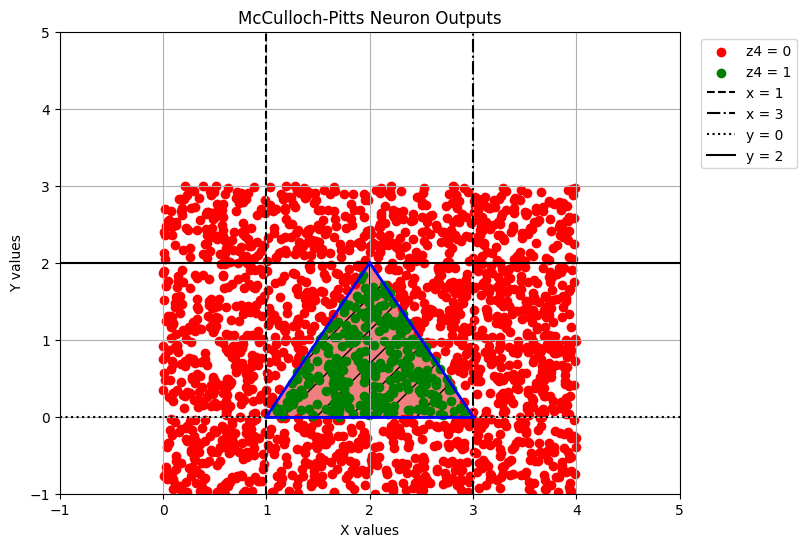

In [7]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)


red_points = []
green_points = []

for i in range(num_points):
    z4_value = Area(x_values[i], y_values[i])
    if z4_value[0] == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)
x11 = np.linspace(1 ,2 , 1000)
x22 = np.linspace(2 ,3 , 1000)
x33 = np.linspace(1 ,3 , 1000)
y11 = ((-z4_value[1].weights[0])*x11+z4_value[1].threshold)/(z4_value[1].weights[1])
y22 = ((-z4_value[2].weights[0])*x22+z4_value[2].threshold)/(z4_value[2].weights[1])
y33 = ((-z4_value[3].weights[0])*x33+z4_value[3].threshold)/(z4_value[3].weights[1])
xh =  np.linspace(1 ,y33 , 1000)
plt.figure(figsize=(8, 6))
plt.fill_between(x22, y22 , y33 , color = 'lightcoral')
plt.fill_between(x11, y11 , y33 , color = 'lightcoral')
plt.fill_between(x22, y22 , y33 , color='none', edgecolor='black', hatch="/")
plt.fill_between(x11, y11 , y33 , color='none', edgecolor='black', hatch="/")
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

plt.axvline(x=1, color='black', linestyle='--', label='x = 1')
plt.axvline(x=3, color='black', linestyle='-.', label='x = 3')
plt.axhline(y=0, color='black', linestyle=':', label='y = 0')
plt.axhline(y=2, color='black', linestyle='-', label='y = 2')

plt.plot(x11, y11 , color = 'blue' , linewidth = 2)
plt.plot(x22, y22 , color = 'blue' , linewidth = 2)
plt.plot(x33, y33 , color = 'blue' , linewidth = 2)
plt.grid(True)


plt.xlim(-1, 5)
plt.ylim(-1, 5)


plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.savefig('c.png', bbox_inches='tight')

plt.show()

plotting triangle and hatch the region that green point are in it for` function with ReLU`

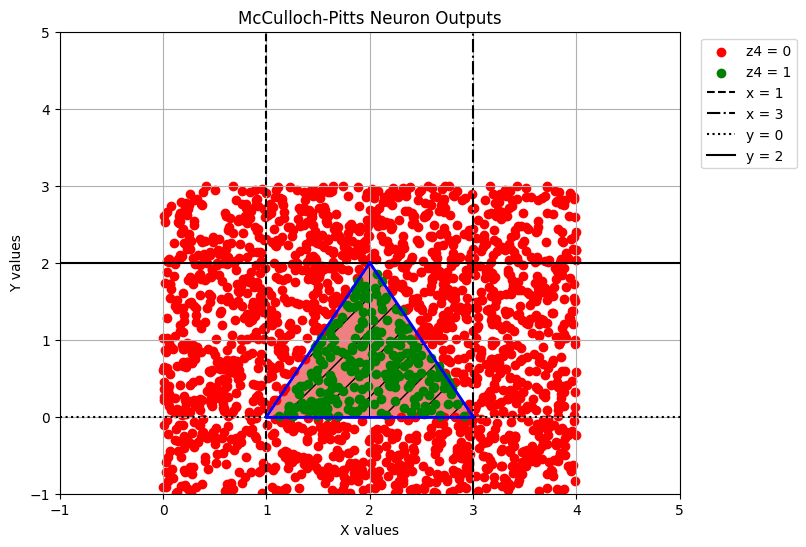

In [8]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)


red_points = []
green_points = []

for i in range(num_points):
    z4_value = Area_ReLU(x_values[i], y_values[i])
    if z4_value[0] == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)
x11 = np.linspace(1 ,2 , 1000)
x22 = np.linspace(2 ,3 , 1000)
x33 = np.linspace(1 ,3 , 1000)
y11 = ((-z4_value[1].weights[0])*x11+z4_value[1].threshold)/(z4_value[1].weights[1])
y22 = ((-z4_value[2].weights[0])*x22+z4_value[2].threshold)/(z4_value[2].weights[1])
y33 = ((-z4_value[3].weights[0])*x33+z4_value[3].threshold)/(z4_value[3].weights[1])
xh =  np.linspace(1 ,y33 , 1000)
plt.figure(figsize=(8, 6))
plt.fill_between(x22, y22 , y33 , color = 'lightcoral')
plt.fill_between(x11, y11 , y33 , color = 'lightcoral')
plt.fill_between(x22, y22 , y33 , color='none', edgecolor='black', hatch="/")
plt.fill_between(x11, y11 , y33 , color='none', edgecolor='black', hatch="/")
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

plt.axvline(x=1, color='black', linestyle='--', label='x = 1')
plt.axvline(x=3, color='black', linestyle='-.', label='x = 3')
plt.axhline(y=0, color='black', linestyle=':', label='y = 0')
plt.axhline(y=2, color='black', linestyle='-', label='y = 2')

plt.plot(x11, y11 , color = 'blue' , linewidth = 2)
plt.plot(x22, y22 , color = 'blue' , linewidth = 2)
plt.plot(x33, y33 , color = 'blue' , linewidth = 2)
plt.grid(True)

plt.xlim(-1, 5)
plt.ylim(-1, 5)

plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.savefig('c.png', bbox_inches='tight')

plt.show()

plotting triangle and hatch the region that green point are in it for` function with sigmoid`

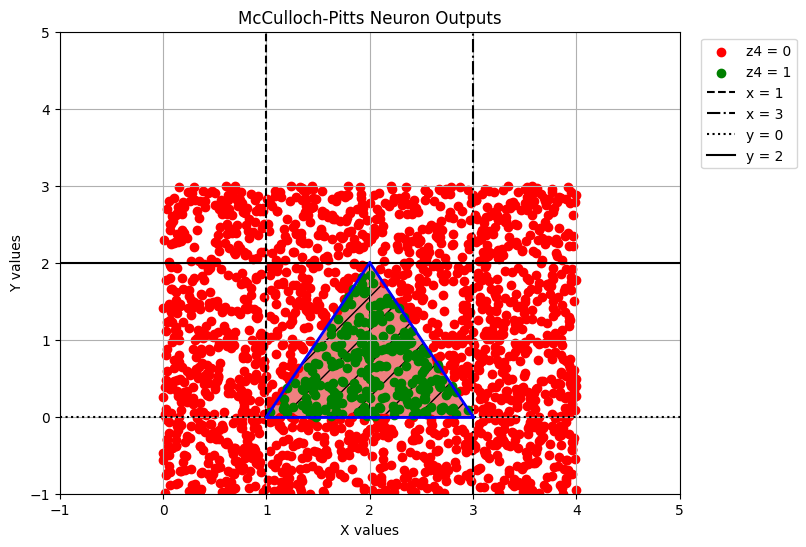

In [9]:
import numpy as np
import matplotlib.pyplot as plt

num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

red_points = []
green_points = []

for i in range(num_points):
    z4_value = Area_sig(x_values[i], y_values[i])
    if z4_value[0] == [0]:
        red_points.append((x_values[i], y_values[i]))
    else:
        green_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)
x11 = np.linspace(1 ,2 , 1000)
x22 = np.linspace(2 ,3 , 1000)
x33 = np.linspace(1 ,3 , 1000)
y11 = ((-z4_value[1].weights[0])*x11+z4_value[1].threshold)/(z4_value[1].weights[1])
y22 = ((-z4_value[2].weights[0])*x22+z4_value[2].threshold)/(z4_value[2].weights[1])
y33 = ((-z4_value[3].weights[0])*x33+z4_value[3].threshold)/(z4_value[3].weights[1])
xh =  np.linspace(1 ,y33 , 1000)
plt.figure(figsize=(8, 6))
plt.fill_between(x22, y22 , y33 , color = 'lightcoral')
plt.fill_between(x11, y11 , y33 , color = 'lightcoral')
plt.fill_between(x22, y22 , y33 , color='none', edgecolor='black', hatch="/")
plt.fill_between(x11, y11 , y33 , color='none', edgecolor='black', hatch="/")
plt.scatter(red_x, red_y, color='red', label='z4 = 0')
plt.scatter(green_x, green_y, color='green', label='z4 = 1')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('McCulloch-Pitts Neuron Outputs')

plt.axvline(x=1, color='black', linestyle='--', label='x = 1')
plt.axvline(x=3, color='black', linestyle='-.', label='x = 3')
plt.axhline(y=0, color='black', linestyle=':', label='y = 0')
plt.axhline(y=2, color='black', linestyle='-', label='y = 2')

plt.plot(x11, y11 , color = 'blue' , linewidth = 2)
plt.plot(x22, y22 , color = 'blue' , linewidth = 2)
plt.plot(x33, y33 , color = 'blue' , linewidth = 2)
plt.grid(True)


plt.xlim(-1, 5)
plt.ylim(-1, 5)


plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))
plt.savefig('c.png', bbox_inches='tight')

plt.show()

q2_1 -> data and data preprocessing

In [10]:
from sklearn.datasets import make_classification
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
!pip install --upgrade --no-cache-dir gdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDClassifier , LogisticRegression , RidgeClassifier
try:
    import mlxtend
except:
    !pip install -U mlxtend
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
!pip install drawdata
!pip install pandas polars
from drawdata import ScatterWidget

In [11]:
!gdown 1qDvHzoD7uHy_Wm067KwyNL8g6OPjRByj
!gdown 140WxA8cuZrukyNC30x1UQ17wtdX7zQMc

Downloading...
From: https://drive.google.com/uc?id=1qDvHzoD7uHy_Wm067KwyNL8g6OPjRByj
To: /content/data_forq2_MP2_csv.csv
100% 3.13M/3.13M [00:00<00:00, 80.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=140WxA8cuZrukyNC30x1UQ17wtdX7zQMc
To: /content/data_forq2.csv
100% 8.24M/8.24M [00:00<00:00, 196MB/s]


In [12]:
import pandas as pd
import numpy as np
import random

data = pd.read_csv('/content/data_forq2.csv')
data2 = pd.read_csv('/content/data_forq2_MP2_csv.csv')
X_true = data[['x']].values
y_fault = data[['y']].values
y_fault2 = data2[['fault2']].values
y_fault3 = data2[['fault3']].values
# X_true = list(X_true)
# y_fault = list(y_fault)
# y_fault2 = list(y_fault2)
# y_fault3 = list(y_fault3)
# X_true_set = random.choices(X_true, k=20000)
# y_fault_set = random.choices(y_fault, k=20000)
# y_fault2_set = random.choices(y_fault2, k=20000)
# y_fault3_set = random.choices(y_fault3, k=20000)

X_true_set = np.array(X_true[:20000])
y_fault_set = np.array(y_fault[:20000])
y_fault2_set = np.array(y_fault2[:20000])
y_fault3_set = np.array(y_fault3[:20000])
# X_true_set = np.array(X_true_set)
# y_fault_set = np.array(y_fault_set)
# y_fault2_set = np.array(y_fault2_set)
# y_fault3_set = np.array(y_fault3_set)

X_true_set = X_true_set.reshape(100 , 200)
y_fault_set = y_fault_set.reshape(100 , 200)
y_fault2_set = y_fault2_set.reshape(100 , 200)
y_fault3_set = y_fault3_set.reshape(100 , 200)
list1 = []
list2 = []
list3 = []
list4 = []
for i in range(100):
  list1.append(1)
  list2.append(0)
  list3.append(2)
  list4.append(3)
one_col = np.array(list1)
zero_col = np.array(list2)
two_col = np.array(list3)
three_col = np.array(list4)
one_col = one_col.reshape(100 , 1)
zero_col = zero_col.reshape(100 , 1)
two_col = two_col.reshape(100 , 1)
three_col = three_col.reshape(100 , 1)
X_true_set_with_label = np.append(X_true_set, one_col , axis = 1)
y_fault_set_with_label = np.append(y_fault_set , zero_col , axis = 1)
y_fault2_set_with_label = np.append(y_fault2_set , two_col , axis = 1)
y_fault3_set_with_label = np.append(y_fault3_set , three_col , axis = 1)
dataset = np.vstack((X_true_set, y_fault_set, y_fault2_set, y_fault3_set))
dataset_with_label = np.vstack((X_true_set_with_label , y_fault_set_with_label , y_fault2_set_with_label , y_fault3_set_with_label))


In [13]:
X_true_set[1].shape

(200,)

In [14]:
from sklearn.utils import shuffle

def Peak(x):
  return np.max(np.abs(x))
def Standard_deviation(x):
  sum = 0
  for i in range(len(x)):
    sum += np.power((x[i] - np.mean(x)) , 2)
  return(np.sqrt(sum/len(x)))
def Skewness(x):
  sum = 0
  for i in range(len(x)):
    sum += (np.power((x[i] - np.mean(x)) , 3))/len(x)
  return sum/(np.power(Standard_deviation(x) , 3))
def Kurtosis(x):
  sum = 0
  for i in range(len(x)):
    sum += (np.power((x[i] - np.mean(x)) , 4))/len(x)
  return sum/(np.power(Standard_deviation(x) , 4))
def RMS(x):
  sum = 0
  for i in range(len(x)):
    sum += np.power(x[i] , 2)
  return np.sqrt((1/len(x))*sum)
def Crest_Factor(x):
  return((Peak(x))/(RMS(x)))
def SMR(x):
  sum = 0
  for i in range(len(x)):
    sum += np.sqrt(np.abs(x[i]))
  return (np.power(sum/len(x) , 2))
def Clearance_Factor(x):
  return((Peak(x))/(SMR(x)))
def Peak_to_Peak(x):
  return (np.max(x) - np.min(x))
def Mean(x):
  return np.mean(x)
def feature(x):
  X_feature = []
  for i in range(100):
    X_feature.append([Peak(x[i]) , Standard_deviation(x[i]) , Skewness(x[i]) , Kurtosis(x[i]) , RMS(x[i]) , Crest_Factor(x[i]) , SMR(x[i]) , Clearance_Factor(x[i]) , Peak_to_Peak(x[i]) , Mean(x[i])])
  X_feature = np.array(X_feature)
  X_feature = X_feature.reshape(100 , 10)
  return X_feature

In [15]:
a1 = np.array([[1 , 2 , 4 , 7]])
Peak_to_Peak(a1)

6

In [16]:
from sklearn.utils import shuffle

feature_X_true = feature(X_true_set)
feature_X_true_with_label = np.append(feature_X_true , one_col , axis = 1)
feature_y_fault = feature(y_fault_set)
feature_y_fault_with_label = np.append(feature_y_fault , zero_col , axis = 1)
feature_y_fault2 = feature(y_fault2_set)
feature_y_fault2_with_label = np.append(feature_y_fault2 , two_col , axis = 1)
feature_y_fault3 = feature(y_fault3_set)
feature_y_fault3_with_label = np.append(feature_y_fault3 , three_col , axis = 1)
feature_data_with_label = np.vstack((feature_X_true_with_label , feature_y_fault_with_label , feature_y_fault2_with_label , feature_y_fault3_with_label))
X_shuffle , y_shuffle = shuffle(feature_data_with_label[: , :10] , feature_data_with_label[: , 10])
y_shuffle = y_shuffle.reshape(400 , 1)
shuffled_data = np.append(X_shuffle , y_shuffle , axis = 1)
X_train , X_test , y_train , y_test = train_test_split(shuffled_data[: , :10] ,
                                                       shuffled_data[: , 10] ,
                                                       test_size = 0.2 ,
                                                       random_state = 74)
X_real_test , X_validation , y_real_test , y_validation = train_test_split(X_test ,
                                                                           y_test ,
                                                                           test_size = 0.2 ,
                                                                           random_state = 74)
y_train = y_train.reshape(320 , 1)
y_real_test = y_real_test.reshape(64 , 1)
y_validation = y_validation.reshape(16 , 1)
y_test = y_test.reshape(80 , 1)
X_train_with_label = np.append(X_train , y_train , axis = 1)
X_real_test_with_label = np.append(X_real_test , y_real_test , axis = 1)
X_validation_with_label = np.append(X_validation , y_validation , axis = 1)


In [17]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()
scaler2 =  StandardScaler()
X_tr_normal = scaler2.fit_transform(X_train)
X_te_normal = scaler2.fit_transform(X_test)
X_val_normal = scaler2.fit_transform(X_validation)
X_trl_normal = np.append(X_tr_normal , y_train , axis = 1)
X_tel_normal = np.append(X_te_normal , y_test , axis = 1)
X_tvl_normal = np.append(X_val_normal , y_validation , axis = 1)

models

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score

import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Dense

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import load_diabetes, load_digits
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch import nn

2024-05-18 20:56:34.517235: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 20:56:34.517299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 20:56:34.518875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 20:56:34.527872: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 20:56:36.962292: W tensorflow/compiler/tf2

Epoch 1/50
20/20 [==============================] - 2s 35ms/step - loss: 1.2967 - acc: 0.3000 - val_loss: 1.2183 - val_acc: 0.3500
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 1.1440 - acc: 0.3812 - val_loss: 1.0987 - val_acc: 0.4500
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 1.0230 - acc: 0.4781 - val_loss: 0.9996 - val_acc: 0.5500
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 0.9243 - acc: 0.6031 - val_loss: 0.9089 - val_acc: 0.6250
Epoch 5/50
20/20 [==============================] - 0s 12ms/step - loss: 0.8396 - acc: 0.6781 - val_loss: 0.8341 - val_acc: 0.6875
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.7682 - acc: 0.7094 - val_loss: 0.7623 - val_acc: 0.7625
Epoch 7/50
20/20 [==============================] - 0s 13ms/step - loss: 0.7042 - acc: 0.7656 - val_loss: 0.7031 - val_acc: 0.7625
Epoch 8/50
20/20 [==============================] - 0s 10ms/step - loss: 0.6512 - acc: 

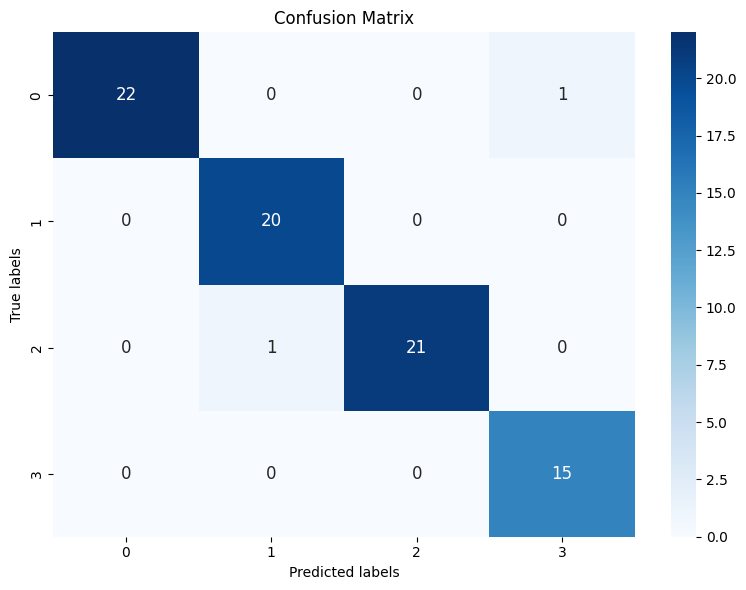

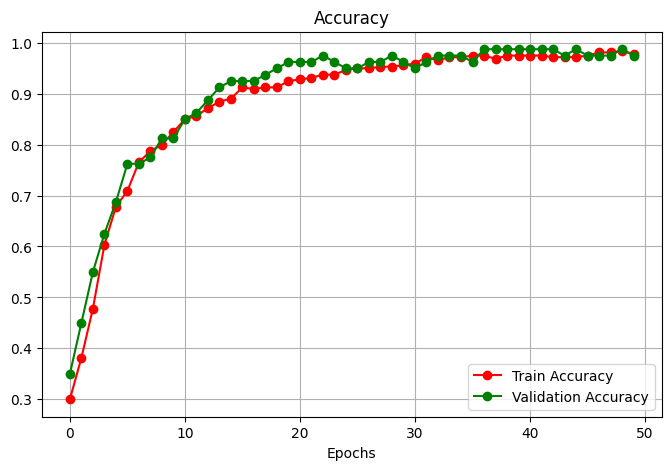

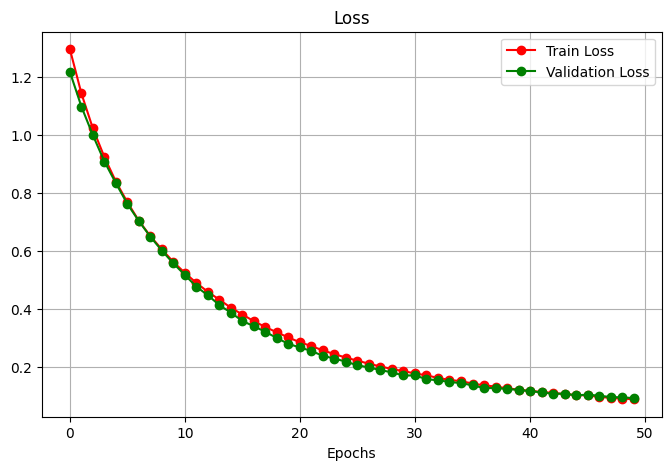

In [19]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential, clone_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model_keras = Sequential(
    [
        Input(shape=(10,), name='Input'),
        Dense(units=12, activation='relu', name='Hidden_1'),
        Dense(units=8, activation='relu', name='Hidden_2'),
        Dense(units=4, activation='softmax', name='Classification')
    ]
)




loss_fn = SparseCategoricalCrossentropy()
optim_fn = Adam(learning_rate=0.001)
model_keras.compile(optimizer=optim_fn, loss=loss_fn, metrics=['acc'])
history = model_keras.fit(X_tr_normal, y_train, validation_data = (X_te_normal, y_test) , epochs=50, batch_size=16)
train_acc = history.history['acc']
train_loss = history.history['loss']
# Validation
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
results = model_keras.evaluate(X_te_normal , y_test)
y_pred_keras = model_keras.predict(X_te_normal)
y_pred_keras_tens = torch.Tensor(y_pred_keras)
y_t_pre = model_keras.predict(X_tr_normal)
rscore_2 = r2_score(y_test , np.argmax(y_pred_keras , axis = 1))

print(rscore_2)

cf_matrix = confusion_matrix(y_test, np.argmax(y_pred_keras , axis = 1))
cf_matrix2 = confusion_matrix(y_train, np.argmax(y_t_pre , axis = 1))

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_acc, 'r-o', label='Train Accuracy')
plt.plot(val_acc, 'g-o', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
# Loss
plt.figure(figsize=(8,5))
plt.plot(train_loss, 'r-o', label='Train Loss')
plt.plot(val_loss, 'g-o', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.grid()
# plt.plot(history.history['loss'], label='train')   # Training loss
# plt.plot(history.history['val_loss'], label='val')  # Validation loss

# plt.legend(['Training Loss', 'Validation Loss'])
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.show()



In [20]:
#  X_shuffle , y_shuffle = shuffle(feature_data_with_label[: , :10] , feature_data_with_label[: , 10])
a = np.array([[1 , 2 , 3 , -1] ,
             [4 , 5 , 6 , -4] ,
             [7 , 8 , 9 , -7]])
a_sh = X_sh , y_sh = shuffle(a[: , :3] , a[: , 3])
print(X_sh)
print(y_sh)
print(X_trl_normal[:10])

[[7 8 9]
 [1 2 3]
 [4 5 6]]
[-7 -1 -4]
[[ 1.47045119e-01 -6.59146848e-02  6.96359087e-01  5.95282337e-01
  -6.79739129e-02  1.39986240e+00  5.55166290e-02  7.21991404e-01
   6.18523211e-02 -4.47946689e-01  0.00000000e+00]
 [-9.50886708e-01 -1.07098644e+00 -3.22652161e+00 -4.67092863e-01
  -1.07503390e+00 -3.62428814e-02 -1.28615412e+00 -3.15798977e-01
  -9.77339156e-01 -1.44382496e+00  1.00000000e+00]
 [ 1.94368387e+00  1.50971800e+00  1.97530042e-01  2.16463483e+00
   1.51082205e+00  1.77731607e+00  1.20446242e+00  2.10120924e+00
   2.02903045e+00  3.21053504e-02  3.00000000e+00]
 [-1.13628120e-01  1.28960137e-01 -1.10582472e-01 -2.21412027e-01
   1.27249754e-01 -2.70816455e-01  3.88397402e-01 -2.91221513e-01
  -8.83899695e-02 -5.11139205e-01  0.00000000e+00]
 [-7.79486246e-01 -6.79023621e-01 -7.23743810e-01 -8.58145597e-01
  -6.82111955e-01 -1.01012848e+00 -6.31771228e-01 -8.96142328e-01
  -7.52271294e-01 -3.57607017e-01  2.00000000e+00]
 [ 5.84711399e-03  1.06427446e-01 -2.65400767e

In [21]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [22]:
torch.manual_seed(74)

from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
class fault(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.RReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.RReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_pytorch = fault(input_features=10,
                    output_features=4,
                    hidden_units=8).to(device)


In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_pytorch.parameters(),
                            lr=0.01)

In [24]:
print(y_train.shape)
y_logits = model_pytorch(torch.Tensor(X_tr_normal))
print(y_logits.shape)

(320, 1)
torch.Size([320, 4])


In [25]:
torch.manual_seed(42)
device = "cuda" if torch.cuda.is_available() else "cpu"
X_tr_normal = torch.Tensor(X_tr_normal)
X_tr_normal = X_tr_normal.type(torch.float)
X_te_normal = torch.Tensor(X_te_normal)
X_te_normal = X_te_normal.type(torch.float)
y_train = torch.Tensor(y_train)
y_train = y_train.reshape(320 ,).type(torch.float)
y_test = torch.Tensor(y_test)
y_test = y_test.reshape(80 ,).type(torch.float)
X_tr_normal, y_train = X_tr_normal.to(device), y_train.to(device)
X_te_normal, y_test = X_te_normal.to(device), y_test.to(device)
# Set number of epochs
epochs = 300
for epoch in range(epochs):
    ### Training
    model_pytorch.train()

    # 1. Forward pass

    y_logits = model_pytorch(torch.Tensor(X_tr_normal)) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    y_train = torch.Tensor(y_train)
    y_train = y_train.reshape(320 ,).type(torch.long)

    loss = loss_fn(y_logits, torch.Tensor(y_train))
    acc = accuracy_fn(y_true=torch.Tensor(y_train),
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_pytorch.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_pytorch(torch.Tensor(X_te_normal))
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      y_test = torch.Tensor(y_test)
      y_test = y_test.reshape(80 ,).type(torch.long)
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=torch.Tensor(y_test),
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.39325, Acc: 25.00% | Test Loss: 1.39713, Test Acc: 25.00%
Epoch: 10 | Loss: 1.39079, Acc: 25.00% | Test Loss: 1.39376, Test Acc: 25.00%
Epoch: 20 | Loss: 1.38712, Acc: 25.00% | Test Loss: 1.39054, Test Acc: 25.00%
Epoch: 30 | Loss: 1.38386, Acc: 25.00% | Test Loss: 1.38735, Test Acc: 25.00%
Epoch: 40 | Loss: 1.38101, Acc: 25.00% | Test Loss: 1.38408, Test Acc: 25.00%
Epoch: 50 | Loss: 1.37575, Acc: 25.00% | Test Loss: 1.38054, Test Acc: 26.25%
Epoch: 60 | Loss: 1.37249, Acc: 25.00% | Test Loss: 1.37682, Test Acc: 26.25%
Epoch: 70 | Loss: 1.36832, Acc: 25.62% | Test Loss: 1.37280, Test Acc: 26.25%
Epoch: 80 | Loss: 1.36377, Acc: 28.12% | Test Loss: 1.36824, Test Acc: 27.50%
Epoch: 90 | Loss: 1.35859, Acc: 32.19% | Test Loss: 1.36303, Test Acc: 30.00%
Epoch: 100 | Loss: 1.35322, Acc: 35.62% | Test Loss: 1.35684, Test Acc: 32.50%
Epoch: 110 | Loss: 1.34470, Acc: 40.62% | Test Loss: 1.34925, Test Acc: 41.25%
Epoch: 120 | Loss: 1.33538, Acc: 45.31% | Test Loss: 1.33993, T